<a href="https://colab.research.google.com/github/mrella/finance/blob/main/graficos_indice_en_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance matplotlib fpdf
!pip install mplfinance ta

[*********************100%***********************]  1 of 1 completed

Descargando datos de AAPL...


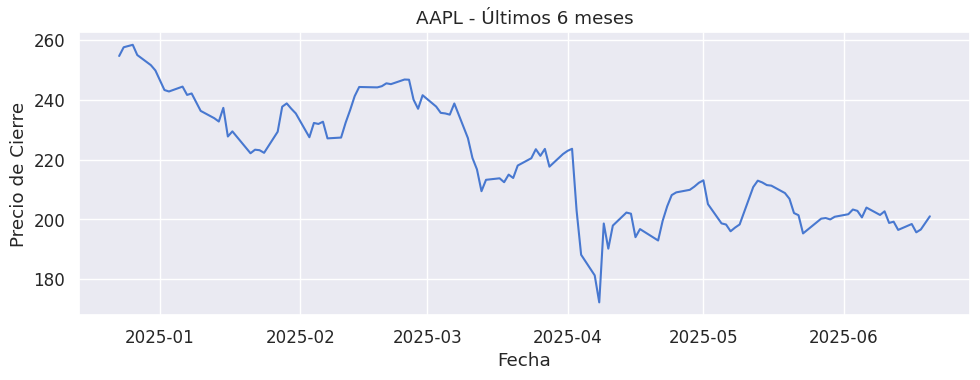

[*********************100%***********************]  1 of 1 completed

Descargando datos de MSFT...


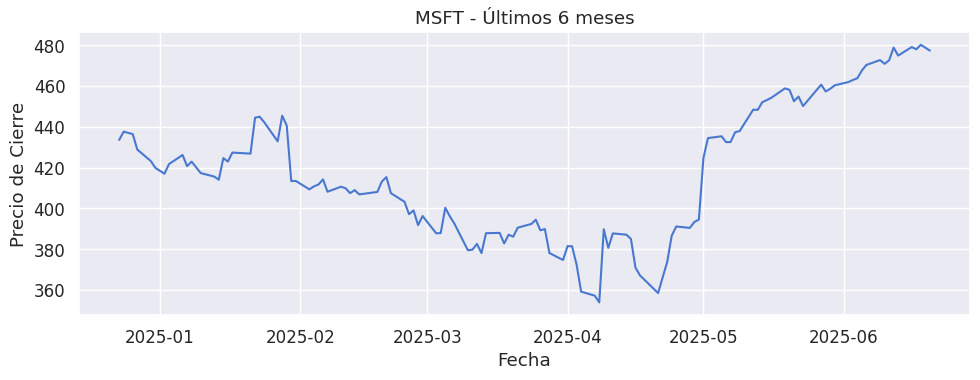

[*********************100%***********************]  1 of 1 completed

Descargando datos de NVDA...


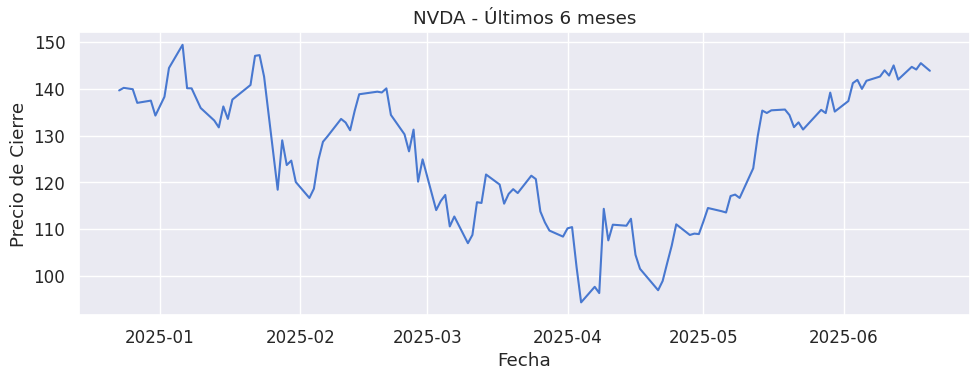

[*********************100%***********************]  1 of 1 completed

Descargando datos de AMZN...


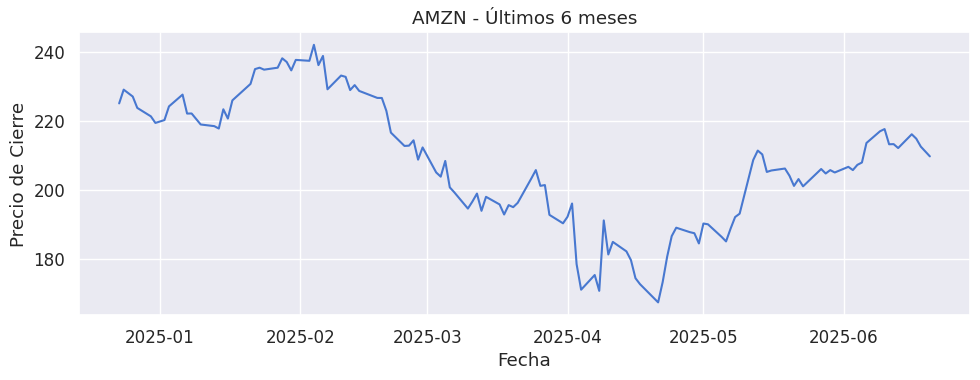

[*********************100%***********************]  1 of 1 completed

Descargando datos de GOOGL...


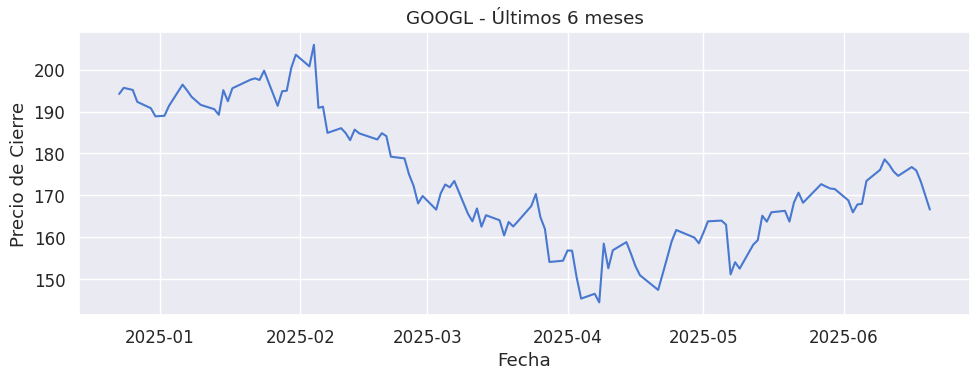

[*********************100%***********************]  1 of 1 completed

Descargando datos de META...


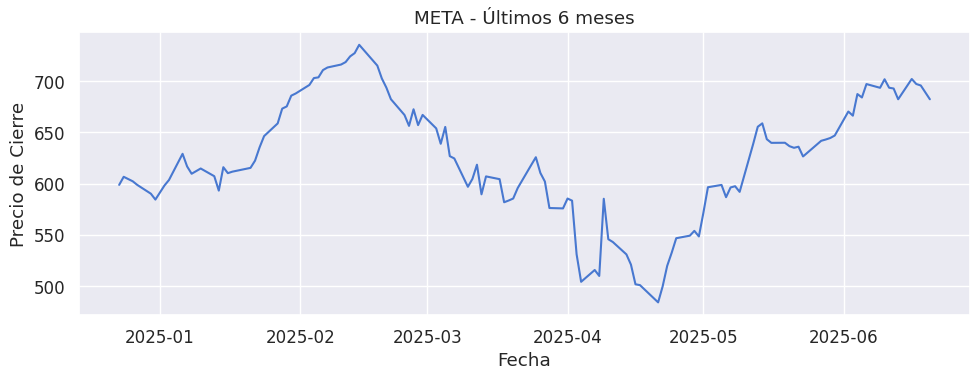

[*********************100%***********************]  1 of 1 completed

Descargando datos de TSLA...


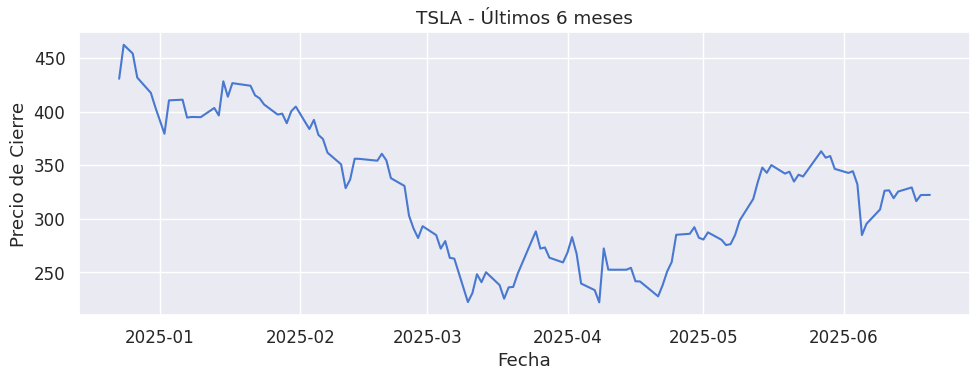

[*********************100%***********************]  1 of 1 completed

Descargando datos de AMD...


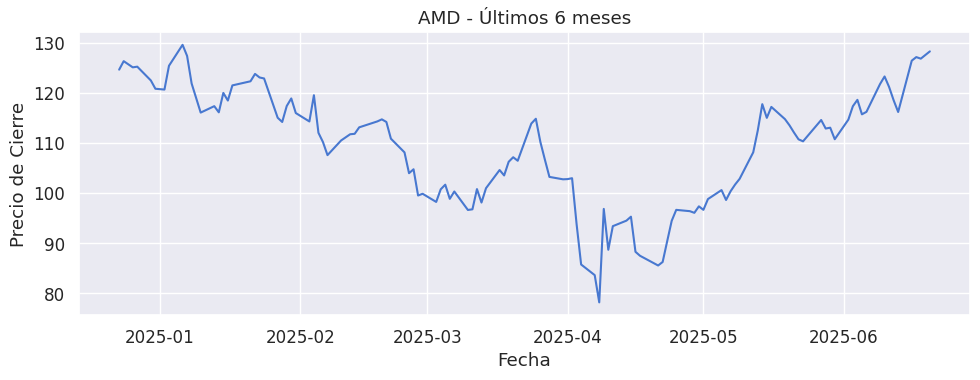

PDF generado exitosamente: charts.pdf


In [11]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
from fpdf import FPDF
from datetime import datetime, timedelta
import ta
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_theme(style="darkgrid", palette="muted", font_scale=1.1)

# Lista de símbolos del NASDAQ-100 (puedes obtenerla dinámicamente si lo deseas)
nasdaq_100 = [
    "AAPL", "MSFT", "AMZN", "NVDA", "GOOGL", "GOOG", "META", "TSLA", "AVGO", "PEP",
    "COST", "ADBE", "CSCO", "NFLX", "AMD", "INTC", "QCOM", "TXN", "AMAT", "INTU",
    "ISRG", "BKNG", "REGN", "ADI", "LRCX", "VRTX", "GILD", "MU", "MDLZ", "PANW",
    "ADP", "PDD", "CSGP", "KLAC", "CDNS", "MAR", "MELI", "ASML", "SNPS", "IDXX",
    "CTSH", "CRWD", "MRNA", "ROST", "MNST", "ORLY", "WBD", "TEAM", "NXPI", "FTNT",
    "CTAS", "KDP", "AZN", "BIIB", "EXC", "CHTR", "XEL", "PCAR", "PAYX", "SIRI",
    "CEG", "FAST", "VRSK", "SGEN", "TTD", "ANSS", "ODFL", "VRSN", "DLTR", "ZS",
    "ALGN", "EBAY", "CDW", "WBA", "INCY", "VERI"
]

nasdaq_100 = [
    "AAPL", "MSFT", "NVDA", "AMZN", "GOOGL", "META", "TSLA", "AMD"
]

# Fechas
end_date = datetime.today()
start_date = end_date - timedelta(days=180)  # últimos 6 meses

def plot_chart(tickers, start_date, end_date):

  # Crear carpeta temporal para guardar los gráficos
  if not os.path.exists("charts"):
      os.makedirs("charts")

  # PDF
  pdf = FPDF()
  pdf.set_auto_page_break(auto=True, margin=15)

  for symbol in tickers:
      try:
          print(f"Descargando datos de {symbol}...")
          data = yf.download(symbol, start=start_date, end=end_date, interval="1d")

          if data.empty:
              print(f"Sin datos para {symbol}, se omite.")
              continue

          # Crear gráfico
          plt.figure(figsize=(10, 4))
          plt.plot(data["Close"], label="Cierre")
          plt.title(f"{symbol} - Últimos 6 meses")
          plt.xlabel("Fecha")
          plt.ylabel("Precio de Cierre")
          plt.grid(True)
          plt.tight_layout()
          chart_path = f"charts/{symbol}.png"
          plt.savefig(chart_path)
          plt.show()
          plt.close()

          # Agregar gráfico al PDF
          pdf.add_page()
          pdf.set_font("Arial", "B", 16)
          pdf.cell(0, 10, f"{symbol} - Gráfico Diario (6 meses)", ln=True, align="C")
          pdf.image(chart_path, x=10, y=30, w=190)

      except Exception as e:
          print(f"Error procesando {symbol}: {e}")

  # Guardar el PDF
  output_file = "charts.pdf"
  pdf.output(output_file)
  print(f"PDF generado exitosamente: {output_file}")



def plot_chart2(tickers, start_date, end_date):
    # Crear carpeta temporal para guardar los gráficos
    if not os.path.exists("charts"):
        os.makedirs("charts")

    # PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)

    for symbol in tickers:
        try:
            print(f"Descargando datos de {symbol}...")
            data = yf.download(symbol, start=start_date, end=end_date, interval="1d")

            if data.empty:
                print(f"Sin datos para {symbol}, se omite.")
                continue

            # === Calcular MACD ===
            short_ema = data["Close"].ewm(span=12, adjust=False).mean()
            long_ema = data["Close"].ewm(span=26, adjust=False).mean()
            macd = short_ema - long_ema
            signal = macd.ewm(span=9, adjust=False).mean()
            hist = macd - signal

            # === Crear gráfico ===
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

            # Precio
            ax1.plot(data["Close"], label="Cierre", color="blue")
            ax1.set_title(f"{symbol} - Últimos 6 meses")
            ax1.set_ylabel("Precio")
            ax1.grid(True)
            ax1.legend()

            # MACD
            ax2.plot(macd, label="MACD", color="black")
            ax2.plot(signal, label="Señal", color="red")
            ax2.bar(data.index, hist, label="Histograma", color="gray", alpha=0.4)
            ax2.set_ylabel("MACD")
            ax2.grid(True)
            ax2.legend()

            plt.tight_layout()
            chart_path = f"charts/{symbol}.png"
            plt.savefig(chart_path)
            plt.show()
            plt.close()


            # Agregar gráfico al PDF
            #pdf.add_page()
            #pdf.set_font("Arial", "B", 16)
            #pdf.cell(0, 10, f"{symbol} - Gráfico Diario + MACD", ln=True, align="C")
            #pdf.image(chart_path, x=10, y=30, w=190)

        except Exception as e:
            print(f"Error procesando {symbol}: {e}")

    # Guardar el PDF
    output_file = "charts.pdf"
    pdf.output(output_file)
    print(f"PDF generado exitosamente: {output_file}")



def plot_chart3(tickers, start_date, end_date):
    if not os.path.exists("charts"):
        os.makedirs("charts")

    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)

    for symbol in tickers:
        try:
            print(f"Descargando datos de {symbol}...")
            data = yf.download(symbol, start=start_date, end=end_date, interval="1d")

            if data.empty:
                print(f"Sin datos para {symbol}, se omite.")
                continue

            # Asegurar formato de índice como datetime y columnas como OHLC
            data.index = pd.to_datetime(data.index)
            data = data[["Open", "High", "Low", "Close", "Volume"]]

            # === Calcular MACD ===
            close = data["Close"]
            macd_line = close.ewm(span=12, adjust=False).mean() - close.ewm(span=26, adjust=False).mean()
            signal_line = macd_line.ewm(span=9, adjust=False).mean()
            macd_hist = macd_line - signal_line

            # Convertir todo a Series 1D
            macd_line = pd.Series(macd_line, index=data.index, name="MACD")
            signal_line = pd.Series(signal_line, index=data.index, name="Signal")
            macd_hist = pd.Series(macd_hist, index=data.index, name="Hist")

            # Crear addplots
            apds = [
                mpf.make_addplot(macd_line, panel=1, color='blue', width=1, ylabel='MACD'),
                mpf.make_addplot(signal_line, panel=1, color='red', width=1),
                mpf.make_addplot(macd_hist, panel=1, type='bar', color='dimgray', alpha=0.5)
            ]

            chart_path = f"charts/{symbol}.png"
            mpf.plot(
                data,
                type='candle',
                style='yahoo',
                title=f"{symbol} - Precio y MACD",
                ylabel='Precio',
                volume=False,
                addplot=apds,
                panel_ratios=(2, 1),
                figscale=1.2,
                savefig=chart_path
            )
            plt.show()

            # Agregar gráfico al PDF
            pdf.add_page()
            pdf.set_font("Arial", "B", 16)
            pdf.cell(0, 10, f"{symbol} - Gráfico Diario + MACD", ln=True, align="C")
            pdf.image(chart_path, x=10, y=30, w=190)

        except Exception as e:
            print(f"Error procesando {symbol}: {e}")

    output_file = "charts.pdf"
    pdf.output(output_file)
    print(f"PDF generado exitosamente: {output_file}")

plot_chart(nasdaq_100, start_date, end_date)


In [3]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
from fpdf import FPDF
from datetime import datetime, timedelta
import ta
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_theme(style="darkgrid", palette="muted", font_scale=1.1)

# Lista del NASDAQ 100 (resumida para ejemplo rápido, puedes ampliar)
nasdaq_100 = [
    "AAPL", "MSFT", "NVDA", "AMZN", "GOOGL", "META", "TSLA", "AMD"
]

# Fechas
end_date = datetime.today()
start_date = end_date - timedelta(days=180)

# Carpeta para gráficos
if not os.path.exists("charts"):
    os.makedirs("charts")

# PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

for symbol in nasdaq_100:
    try:
        print(f"Procesando {symbol}...")
        df = yf.download(symbol, start=start_date, end=end_date, interval="1d")
        if df.empty:
            continue

        df.dropna(inplace=True)

        # Preparar datos
        df["EMA20"] = ta.trend.ema_indicator(df["Close"], window=20)
        df["EMA20_std"] = df["Close"].rolling(window=20).std()
        df["Upper_KC"] = df["EMA20"] + 2 * df["EMA20_std"]
        df["Lower_KC"] = df["EMA20"] - 2 * df["EMA20_std"]

        # MACD
        macd = ta.trend.macd(df["Close"])
        df["MACD"] = macd.macd()
        df["MACD_signal"] = macd.macd_signal()

        # Crear subplots
        apds = [
            mpf.make_addplot(df["Upper_KC"], color='orange'),
            mpf.make_addplot(df["Lower_KC"], color='orange'),
            mpf.make_addplot(df["MACD"], panel=2, color='blue', ylabel='MACD'),
            mpf.make_addplot(df["MACD_signal"], panel=2, color='red'),
        ]

        # Guardar gráfico
        chart_path = f"charts/{symbol}.png"
        mpf.plot(df, type='candle', style='yahoo', volume=True,
                 addplot=apds, title=f"{symbol} - 6 Meses",
                 savefig=dict(fname=chart_path, dpi=150, bbox_inches='tight'))

        # Añadir al PDF
        pdf.add_page()
        pdf.set_font("Arial", "B", 14)
        pdf.cell(0, 10, f"{symbol} - Gráfico de Velas, Volumen, MACD, Keltner", ln=True, align="C")
        pdf.image(chart_path, x=10, y=30, w=190)

    except Exception as e:
        print(f"Error con {symbol}: {e}")

# Guardar PDF
pdf.output("nasdaq100_analisis_tecnico.pdf")
print("✅ PDF generado: nasdaq100_analisis_tecnico.pdf")


Procesando AAPL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Error con AAPL: Data must be 1-dimensional, got ndarray of shape (122, 1) instead
Procesando MSFT...
Error con MSFT: Data must be 1-dimensional, got ndarray of shape (122, 1) instead
Procesando NVDA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Error con NVDA: Data must be 1-dimensional, got ndarray of shape (122, 1) instead
Procesando AMZN...
Error con AMZN: Data must be 1-dimensional, got ndarray of shape (122, 1) instead
Procesando GOOGL...
Error con GOOGL: Data must be 1-dimensional, got ndarray of shape (122, 1) instead
Procesando META...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Error con META: Data must be 1-dimensional, got ndarray of shape (122, 1) instead
Procesando TSLA...
Error con TSLA: Data must be 1-dimensional, got ndarray of shape (122, 1) instead
Procesando AMD...
Error con AMD: Data must be 1-dimensional, got ndarray of shape (122, 1) instead
✅ PDF generado: nasdaq100_analisis_tecnico.pdf
